## Projeto Final
Amanda Kellen Soares de Pinho
Matrícula : 2017098188


# Tema: Diabetes 


Segundo o [tua saúde](https://www.tuasaude.com/diabetes/):

A diabetes, conhecida cientificamente como Diabetes mellitus, é uma doença metabólica crônica caracterizada pelo aumento dos níveis de açúcar/glicose no sangue. Isso acontece porque a insulina, que é o hormônio que transporta a glicose do sangue para o interior das células não é produzida ou não funciona corretamente, fazendo com que o açúcar se vá acumulando no sangue ao invés de ser gasto nas células do corpo.

Na maior parte dos casos, a diabetes surge ao longo da vida, principalmente devido a maus hábitos de alimentação, mas também pode estar presente desde o nascimento.

# Motivação
Neste projeto serão feita análises utilizando o [banco de dados](https://www.kaggle.com/uciml/pima-indians-diabetes-database).Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais.O objetivo do conjunto de dados apresentado é prever a partir de alguns dados de cada paciente se ele tem diabetes ou não.Neste conjunto de dados todos os pacientes são mulheres com peo menos 21 anos de herança indígena Pima.

# Análise realizada

Neste trabalho serão respondidas as seguintes perguntas:

*   A grossura da pele do triceps tem alguma relação com a chance de ter diabetes e o valor da glicose?

*   A idade tem alguma relação com a chance de se ter diabetes e com o aumento da glicose?

*   Existe relação entre glicose, insulina, pressão sanguinea?


# Descrição dos dados:

A base de dados utilizada possui nove colunas e 768 linhas,abaixo estão a descrição de cada uma das colunas.

*   Pregnancies: Número de vezes que engravidou;

*   Glucose : Concentração de glicose plasmática em um teste oral de tolerância à glicose;

*   BloodPressure : Pressão arterial diastólica (mm Hg);

*   SkinThickness : Espessura da dobra da pele do tríceps (mm);

*   Insulin : Insulina sérica  (mu U / ml)

*   BMI : Indice de massa corporal (peso em kg / (altura em m) ^ 2)

*   DiabetesPedigreeFunction: Função que calcula a chance de se ter diabetes de acordo com o histórico na família;

*   Age : Anos de idade;

*   Outcome : Variável de classe (0 ou 1) em que é 1 quando a paciente possui diabetes e 0 quando não possui




# Leitura do Banco de dados

In [16]:
import warnings
import pandas as pd
import numpy  as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from scipy import stats as ss  
    
warnings.filterwarnings('ignore')

df= pd.read_csv('diabetes.csv',index_col=None)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Análise exploratória dos dados

Abaixo iremos realizar a análise exploratória dos dados.Para uma melhor vizualização foi utilizado a biblioteca pandas_profiling


In [17]:
profile = ProfileReport(df, title='Profiling Diabets',html={'style':{'full_width':True}})

In [18]:
profile.to_notebook_iframe()

In [19]:
filtro = df['Outcome'] == 1
print("Pessoas diabéticas:")
df[filtro].head()

Pessoas diabéticas:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
2            8      183             64              0        0  23.3   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1

In [20]:
print("Pessoas Saudáveis:")
df[~filtro].head()

Pessoas Saudáveis:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1             1       85             66             29        0  26.6   
3             1       89             66             23       94  28.1   
5             5      116             74              0        0  25.6   
7            10      115              0              0        0  35.3   
10            4      110             92              0        0  37.6   

    DiabetesPedigreeFunction  Age  Outcome  
1                      0.351   31        0  
3                      0.167   21        0  
5                      0.201   30        0  
7                      0.134   29        0  
10                     0.191   30        0

In [21]:
# Verificando se o Dataframe possui valores Nulos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Agora para melhor visualização dos dados iremos verificar a diferença entre as médias de pessoas diabéticas e pessoas saudáveis.

In [22]:
print("Diferença das médias dos dados entre pessoas saudáveis e diabéticas")
print(df[filtro].mean() - df[~filtro].mean())

Diferença das médias dos dados entre pessoas saudáveis e diabéticas
Pregnancies                  1.567672
Glucose                     31.277463
BloodPressure                2.640627
SkinThickness                2.500179
Insulin                     31.543821
BMI                          4.838337
DiabetesPedigreeFunction     0.120766
Age                          5.877164
Outcome                      1.000000
dtype: float64


In [23]:
print("Médias e medianas de pessoas saudáveis\n")
print("Média de gravidezes: {}".format(df[filtro]['Pregnancies'].mean()))
print("Mediana de gravidezes: {}\n".format(df[filtro]['Pregnancies'].median()))

print("Média da glicose: {}".format(df[filtro]['Glucose'].mean()))
print("Mediana da glicose: {}\n".format(df[filtro]['Glucose'].median()))

print("Média da pressão sanguínea: {}".format(df[filtro]['BloodPressure'].mean()))
print("Mediana da pressão sanguínea: {}\n".format(df[filtro]['BloodPressure'].median()))

print("Média da grossura do tríceps: {}".format(df[filtro]['SkinThickness'].mean()))
print("Mediana da grossura do tríceps: {}\n".format(df[filtro]['SkinThickness'].median()))

print("Média da insulina: {}".format(df[filtro]['Insulin'].mean()))
print("Mediana da insulina: {}\n".format(df[filtro]['Insulin'].median()))

print("Média do BMI: {}".format(df[filtro]['BMI'].mean()))
print("Mediana do BMI: {}\n".format(df[filtro]['BMI'].median()))

print("Média da probabilidade de diabetes na família: {}".format(df[filtro]['DiabetesPedigreeFunction'].mean()))
print("Mediana da probabilidade de diabetes na família: {}\n".format(df[filtro]['DiabetesPedigreeFunction'].median()))

print("Média da idade: {}".format(df[filtro]['Age'].mean()))
print("Mediana da idade: {}\n".format(df[filtro]['Age'].median()))

Médias e medianas de pessoas saudáveis

Média de gravidezes: 4.865671641791045
Mediana de gravidezes: 4.0

Média da glicose: 141.25746268656715
Mediana da glicose: 140.0

Média da pressão sanguínea: 70.82462686567165
Mediana da pressão sanguínea: 74.0

Média da grossura do tríceps: 22.16417910447761
Mediana da grossura do tríceps: 27.0

Média da insulina: 100.33582089552239
Mediana da insulina: 0.0

Média do BMI: 35.14253731343284
Mediana do BMI: 34.25

Média da probabilidade de diabetes na família: 0.5505
Mediana da probabilidade de diabetes na família: 0.449

Média da idade: 37.06716417910448
Mediana da idade: 36.0



In [24]:
#pessoas diabéticas
print("Médias e medianas de Pessoas diabéticas:\n")
print("Média de gravidezes: {}".format(df[~filtro]['Pregnancies'].mean()))
print("Mediana de gravidezes: {}\n".format(df[~filtro]['Pregnancies'].median()))

print("Média da glicose: {}".format(df[~filtro]['Glucose'].mean()))
print("Mediana da glicose: {}\n".format(df[~filtro]['Glucose'].median()))

print("Média da pressão sanguínea: {}".format(df[~filtro]['BloodPressure'].mean()))
print("Mediana da pressão sanguínea: {}\n".format(df[~filtro]['BloodPressure'].median()))

print("Média da grossura do tríceps: {}".format(df[~filtro]['SkinThickness'].mean()))
print("Mediana da grossura do tríceps: {}\n".format(df[~filtro]['SkinThickness'].median()))

print("Média da insulina: {}".format(df[~filtro]['Insulin'].mean()))
print("Mediana da insulina: {}\n".format(df[~filtro]['Insulin'].median()))

print("Média do BMI: {}".format(df[~filtro]['BMI'].mean()))
print("Mediana do BMI: {}\n".format(df[~filtro]['BMI'].median()))

print("Média da probabilidade de diabetes na família: {}".format(df[~filtro]['DiabetesPedigreeFunction'].mean()))
print("Mediana da probabilidade de diabetes na família: {}\n".format(df[~filtro]['DiabetesPedigreeFunction'].median()))

print("Média da idade: {}".format(df[~filtro]['Age'].mean()))
print("Mediana da idade: {}\n".format(df[~filtro]['Age'].median()))

Médias e medianas de Pessoas diabéticas:

Média de gravidezes: 3.298
Mediana de gravidezes: 2.0

Média da glicose: 109.98
Mediana da glicose: 107.0

Média da pressão sanguínea: 68.184
Mediana da pressão sanguínea: 70.0

Média da grossura do tríceps: 19.664
Mediana da grossura do tríceps: 21.0

Média da insulina: 68.792
Mediana da insulina: 39.0

Média do BMI: 30.3042
Mediana do BMI: 30.05

Média da probabilidade de diabetes na família: 0.42973400000000006
Mediana da probabilidade de diabetes na família: 0.336

Média da idade: 31.19
Mediana da idade: 27.0



# A grossura da pele do triceps tem alguma relação com a chance de ter diabetes e o valor da glicose?


Primeiramente iremos verificar a correlação  para maior simplicidade e melhor visualização dos dados.

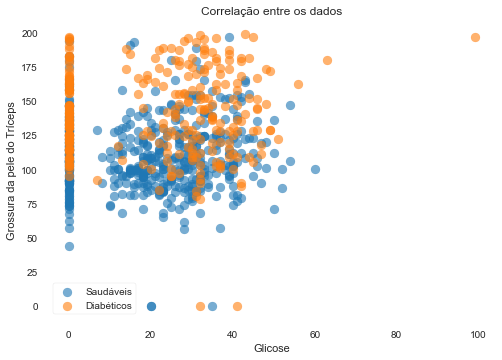

In [25]:
diabeticos = df[filtro]
saudaveis = df[~filtro]

plt.scatter(saudaveis['SkinThickness'], saudaveis['Glucose'],alpha=0.6,
            s=80, Label = "Saudáveis",cmap='viridis')#cmap='viridis'

plt.scatter(diabeticos['SkinThickness'], diabeticos['Glucose'],
            alpha=0.6, s=80, Label = "Diabéticos",cmap='viridis')

plt.title("Correlação entre os dados")
plt.xlabel('Glicose')
plt.ylabel('Grossura da pele do Tríceps')
plt.legend()

plt.show()

In [27]:
df_aux = df [['Glucose','SkinThickness','Outcome'] ]

print("Correlação:\n {}".format(df_aux.corr()))



Correlação:
                 Glucose  SkinThickness   Outcome
Glucose        1.000000       0.057328  0.466581
SkinThickness  0.057328       1.000000  0.074752
Outcome        0.466581       0.074752  1.000000


Podemos concluir que a correlação entre os dados é baixa.

Agora iremos realizar um teste para ver se realmente os modelos não são relacionados e não geram resultado plausível.Para isso iremos utilizar três modelos de classificação para comparação.


# Separando dados entre Treino e teste

Agora iremos separar os dados entre treino e teste para uso nos três modelos de classificação, para isso foi utilizado train_test_split.

In [28]:
#Separando dados entre Treino e teste
df_tcp = df[['SkinThickness', 'Glucose']]

x_train, x_test, y_train, y_test = train_test_split( df_tcp, 
                                                    df['Outcome'], 
                                                    test_size=0.33, 
                                                    random_state=42)

# Regressão Logistica

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.Como em nossa base de dados possuímos o campo Outcome binária e esta é o nosso Target, esse modelo foi escolhido para classificação dos nosso dados.

Foi utilizado pipeline para evitar erros de manipulação de conjuntos de treino e teste.

In [29]:
regl= LogisticRegression()
regl.fit(x_train,y_train)
pred_rg= regl.predict(x_test)
Acuracia = np.mean(cross_val_score(regl, x_train, y_train, cv=5))
print("Acurácia: {}\n".format(regl.score(x_test,y_test)))

Acurácia: 0.7244094488188977



In [30]:
coeff = pd.DataFrame(x_train.columns)

coeff['Coeficientes'] = regl.coef_.tolist()[0]
print(coeff)

               0  Coeficientes
0  SkinThickness      0.007705
1        Glucose      0.040138


Com a regressão Linear obtemos uma boa acurácia e com a matriz de coeficientes plotada acima podemos concluir que para calcular a classificação do modelo, a glicose teve um peso maior.

 Para melhor visualização dos resultados obtidos com o modelo, abaixo estão apreentadas as distribuições de acertos

In [31]:
target_names = ['Saudável', 'Diabético']
print(classification_report(y_test, pred_rg,target_names=target_names))

              precision    recall  f1-score   support

    Saudável       0.76      0.85      0.80       168
   Diabético       0.62      0.48      0.54        86

    accuracy                           0.72       254
   macro avg       0.69      0.66      0.67       254
weighted avg       0.71      0.72      0.71       254



Com isso podemos concluir que o modelo de regressão Logistica apresentado bom desempenho para predizer pessoas que não possuem diabetes, porém este resultado não é satisfatória para a classificação de pessoas com diabetes.Abaixo está apresentado a matriz de confusão para melhor vizualização.

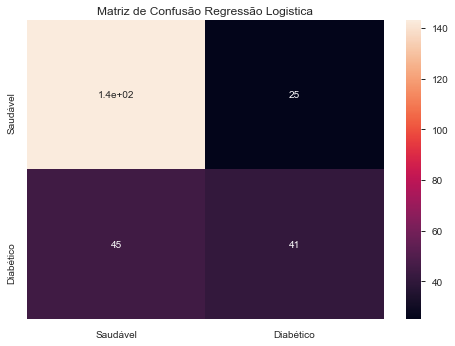

In [32]:
 
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, regl.predict(x_test)), annot=True, ax = ax)
ax.xaxis.set_ticklabels(['Saudável', 'Diabético'])
ax.yaxis.set_ticklabels(['Saudável', 'Diabético'])
plt.title("Matriz de Confusão Regressão Logistica")
plt.show()

# Random Forest

Agora iremos utilizar random forest para classificação dos nossos dados.Para isso foi utilizado o mesmo método utilizado para regressão logistica

In [33]:

from sklearn.ensemble import RandomForestClassifier
#rf = Pipeline([('scaler',MinMaxScaler()),('clf', RandomForestClassifier(random_state=42))])
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print("Acurácia: {}".format(rf.score(x_test,y_test)))

Acurácia: 0.6535433070866141


In [34]:
coeff = pd.DataFrame(x_train.columns)

coeff['Coeficientes'] = rf.feature_importances_.tolist()[0]
print(coeff)

               0  Coeficientes
0  SkinThickness      0.259535
1        Glucose      0.259535


A acurárica obtida foi menor que a de regressão logistica, e para este modelo ambos os coeficiente obtiveram pesos iguais.

Vamos verificar se as distribuições de acerto foram melhores abaixo.

In [35]:
print((classification_report(y_test, pred_rf,target_names=target_names)))


              precision    recall  f1-score   support

    Saudável       0.74      0.73      0.74       168
   Diabético       0.49      0.50      0.49        86

    accuracy                           0.65       254
   macro avg       0.61      0.62      0.62       254
weighted avg       0.66      0.65      0.65       254



Podemos concluir que para os nossos dados o método de regressão logistica teve um desempenho mais satisfatório.

Abaixo esta apresentada a matriz de confusão do modelo.

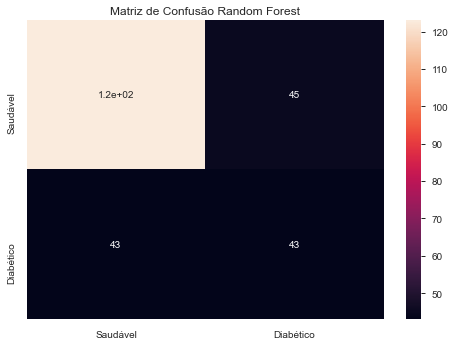

In [36]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, rf.predict(x_test)), annot=True, ax = ax)
ax.xaxis.set_ticklabels(['Saudável', 'Diabético'])
ax.yaxis.set_ticklabels(['Saudável', 'Diabético'])
plt.title("Matriz de Confusão Random Forest")
plt.show()


# SVM

Abaixo repetimos os procedimentos realizados com os outros modelos utilizados usando o modelo SVM.


In [37]:
from sklearn import svm

#model_svm =Pipeline([('scaler',MinMaxScaler()),('clf', svm.SVC())])
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train, y_train)
predict_svm = model_svm.predict(x_test)
print("Acurácia: {}".format(model_svm.score(x_test,y_test)))

Acurácia: 0.7244094488188977


In [38]:
coeff = pd.DataFrame(x_train.columns)

coeff['Coeficientes'] = model_svm.coef_.tolist()[0]
coeff

0  Coeficientes
0  SkinThickness      0.004968
1        Glucose      0.030629

A acurácia obtida foi maior que a do Random Forest e igual a obtida na regressão Logística, assim como na regressão logistica a glicose teve um peso maior para a classificação dos dados, oq ue já era esperado visto que a glicose é um fator determinante para verificação se uma pessoa possui ou não diabetes.

Agora vamos verificar se a distribuição de acertos foi melhor.

In [39]:
print(classification_report(y_test, predict_svm,target_names=target_names))

              precision    recall  f1-score   support

    Saudável       0.75      0.87      0.81       168
   Diabético       0.63      0.44      0.52        86

    accuracy                           0.72       254
   macro avg       0.69      0.66      0.66       254
weighted avg       0.71      0.72      0.71       254



Este modelo obteve resultado mais satisfatório para a classificação de pessoas com diabetes de todos os modelos utilizados,
porém o modelo de regressão logistica apresentou melhor resultado para classificação de pessoas não diabéticas.

Abaixo está apresentado a matriz de confusão do modelo.


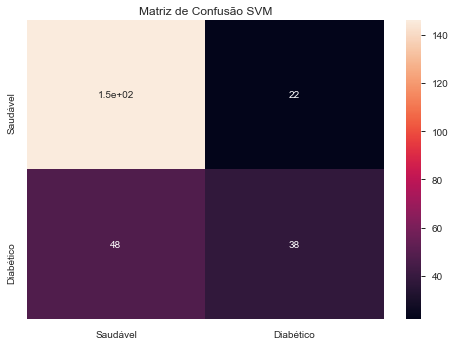

In [40]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model_svm.predict(x_test)), annot=True, ax = ax)
ax.xaxis.set_ticklabels(['Saudável', 'Diabético'])
ax.yaxis.set_ticklabels(['Saudável', 'Diabético'])
plt.title("Matriz de Confusão SVM")
plt.show()

# Teste de Hipóteses

Abaixo está apresentadp um  teste de hipótese via permutações.

* H0: A correlação observada é estatisticamente explicada por permutações.
* H1: A correlação observada é mais extrema do que permutações



In [41]:
N = 1000
df_outcome = df['Outcome'].copy()
df_tcp = df['SkinThickness'].copy()

permutacoes =[]
for i in range(N):
    np.random.shuffle(df_outcome)
    df_auxiliar = pd.DataFrame({'Outcome':df_outcome,
                                'SkinThickness' :df_tcp,
                                })
    corr = df_auxiliar.corr()
    permutacoes.append(corr['Outcome']['SkinThickness'])
permutacoes = np.array(permutacoes)
rho, p_val = ss.pearsonr(df_tcp, df_outcome)


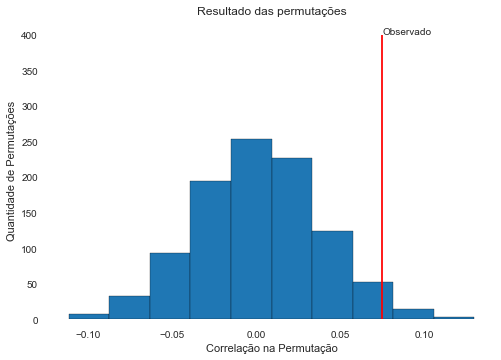

In [42]:
df_aux = df[['Outcome','SkinThickness']]
corr =df_aux.corr()
plt.hist(permutacoes, edgecolor='k')
#plt.hist(df_aux['SkinThickness'], edgecolor='k')
plt.xlabel('Correlação na Permutação')
plt.ylabel('Quantidade de Permutações')
plt.vlines(corr['Outcome']['SkinThickness'], 0, 400, color='r')
plt.text(corr['Outcome']['SkinThickness'], 400, 'Observado')
plt.title("Resultado das permutações")
plt.show()



In [43]:
print("Testando Hipótese nula")
sum(permutacoes > corr['Outcome']['SkinThickness']) / len(permutacoes)

Testando Hipótese nula


0.028

Com isso podemos concluir que esta não é significativa e podemos rejeitar a hipótese nula

Com isso podemos concluir que a grossura da pele do triceps não ter relação entre diabetes e a glicose

# A idade tem alguma relação com a chance de se ter diabetes e com o aumento da glicose?





Primeiramente vamos plotar a dispersão dos dados.

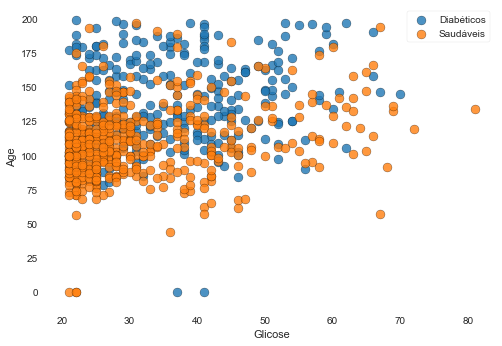

In [44]:
df_idade_d = diabeticos[['Age','Glucose']]
df_idade_s = saudaveis[['Age','Glucose']]

plt.scatter(df_idade_d['Age'], diabeticos['Glucose'],alpha=0.8,Label =  "Diabéticos", edgecolors='k',cmap='RdBu', s=80)
plt.scatter(df_idade_s['Age'], saudaveis['Glucose'], alpha=0.8, Label = "Saudáveis", edgecolors='k',cmap='RdBu', s=80)
plt.xlabel('Glicose')
plt.ylabel('Age')
plt.legend()
plt.show()


df_age = df[['Age','Glucose']].copy()

In [45]:
print("Correlação:\n{}".format(df_age.corr()))

Correlação:
              Age   Glucose
Age      1.000000  0.263514
Glucose  0.263514  1.000000


Com isso podemos verificar que os dados não possuem forte correlação.

Abaixo estão apresentados os modelos de classificação que serão utilizados apresentando o mesmo teste realizado para pele do tríceps.

# Separando dados entre treino e teste

In [46]:

x_train, x_test, y_train, y_test = train_test_split( df_age, 
                                                    df['Outcome'], 
                                                    test_size=0.33, 
                                                    random_state=42)

# Regresão Logistica


In [47]:
#model = Pipeline([('scaler',MinMaxScaler()),('clf', LogisticRegression())])
model =LogisticRegression()
model.fit(x_train,y_train)
np.mean(cross_val_score(model, x_train, y_train, cv=5))

#Realizando a predição e calculando as métricas
pred_rl = model.predict(x_test)


print("Acurácia: {}".format(model.score(x_test,y_test)))

Acurácia: 0.7322834645669292


In [48]:
coeff = pd.DataFrame(x_train.columns)

coeff['Coeficientes'] = model_svm.coef_.tolist()[0]
coeff

0  Coeficientes
0      Age      0.004968
1  Glucose      0.030629

In [49]:
print((classification_report(y_test, pred_rl,target_names=target_names)))

              precision    recall  f1-score   support

    Saudável       0.77      0.86      0.81       168
   Diabético       0.64      0.49      0.55        86

    accuracy                           0.73       254
   macro avg       0.70      0.67      0.68       254
weighted avg       0.72      0.73      0.72       254



# Random Forest

In [50]:
#random = Pipeline([('scaler',MinMaxScaler()),('clf', RandomForestClassifier())])
random = RandomForestClassifier()
random.fit(x_train, y_train)
predict = random.predict(x_test)
print("Acurácia: {}".format(random.score(x_test,y_test)))

Acurácia: 0.6692913385826772


In [51]:
coeff = pd.DataFrame(x_train.columns)

coeff['Coeficientes'] = random.feature_importances_.tolist()[0]
coeff

0  Coeficientes
0      Age      0.361045
1  Glucose      0.361045

In [52]:
print((classification_report(y_test, predict)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       168
           1       0.51      0.47      0.49        86

    accuracy                           0.67       254
   macro avg       0.63      0.62      0.62       254
weighted avg       0.66      0.67      0.67       254



# SVM

In [53]:
#sv = Pipeline([('scaler',MinMaxScaler()),('clf', svm.SVC())])
sv = svm.SVC()
sv.fit(x_train, y_train)
predict = sv.predict(x_test)

In [54]:
print("Acurácia: {}".format(sv.score(x_test,y_test)))

Acurácia: 0.7440944881889764


In [55]:
coeff = pd.DataFrame(x_train.columns)

coeff['Coeficientes'] = model_svm.coef_.tolist()[0]
coeff

0  Coeficientes
0      Age      0.004968
1  Glucose      0.030629

In [56]:
print((classification_report(y_test, predict,target_names=target_names)))

              precision    recall  f1-score   support

    Saudável       0.76      0.89      0.82       168
   Diabético       0.68      0.45      0.55        86

    accuracy                           0.74       254
   macro avg       0.72      0.67      0.68       254
weighted avg       0.74      0.74      0.73       254



Neste caso podemos concluir que nenhum dos modelos obtiveram resultados satisfatórios para a classificação de pessoas com diabetes.


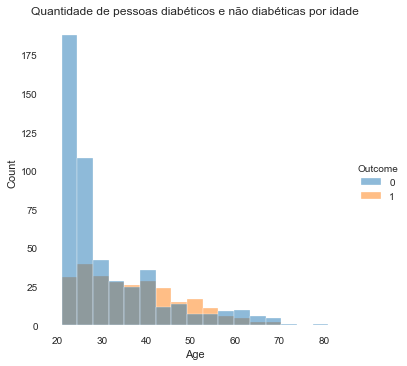

In [57]:
sns.displot(df, x="Age", hue="Outcome")

plt.title("Quantidade de pessoas diabéticos e não diabéticas por idade")
plt.show()

Com esse gráficos podemos verificar que a maior ocorrência de pessoas que possuem diabetes presentes no banco de dados possuem próximo de 30 anos e pessoas próximas dos 20 anos tendem a ter menos ocorrência de diabetes.Logo podemos concluir que quanto mais velha a pessoa, maior a chance de se ter diabetes.

In [58]:
df_menor = df[df['Age'] < 35]
df_menor.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0

In [59]:
df_maior = df[df['Age'] >= 35]
df_maior.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
8                      0.158   53        1  
9                      0.232   54        1  
12                     1.441   57        0  
13                     0.398   59        1

In [60]:
def bootstrap_mean(data_frame, column,n, size):
    values = np.zeros(n)
    for i in range(n):
        sample = data_frame[column].sample(size, replace=True)
        values[i] = sample.mean()
    return values


In [61]:
def ic_bootstrap(df, column, n, size):       
    values = bootstrap_mean(df, column, n, size)
    return (np.percentile(values, 2.5), np.percentile(values, 97.5))

In [62]:
#Intervalo de confiança da glicose de pessoas com menos de 35 anos
ic_bootstrap(df_menor,'Glucose',5000,len(df_menor))

(113.23750000000001, 118.24180327868852)

In [63]:
#Intervalo de confiança da glicose de pessoas com mais de 35 anos
ic_bootstrap(df_maior,'Glucose',5000,len(df_maior))

(125.99285714285715, 133.92142857142858)

In [64]:
def bootstrap_diff(df1, df2, column, n=5000, size=None):
  
    if size is None:
        size = len(df)
    values = np.zeros(n)
    for i in range(n):
        sample1 = df1[column].sample(size, replace=True)
        sample2 = df2[column].sample(size, replace=True)
        values[i] = sample1.mean() - sample2.mean()
    return values

In [65]:
diff = bootstrap_diff(df_maior, df_menor, 'Glucose')

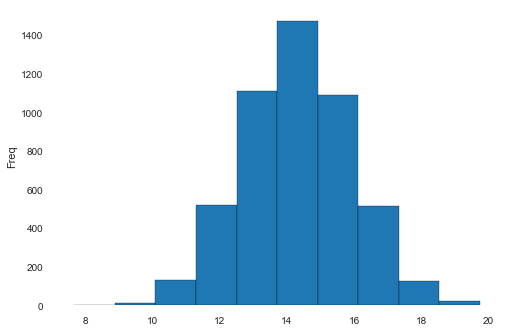

In [66]:
plt.hist(diff, edgecolor='k')
plt.ylabel('Média idade >35 - Média idade < 35')
plt.ylabel('Freq')
plt.show()

# Existe relação entre glicose, insulina, pressão sanguinea?

In [67]:
df_p3 = df[['Glucose', 'BloodPressure', 'Insulin']]

In [68]:
df_p3.corr()

Glucose  BloodPressure   Insulin
Glucose        1.000000       0.152590  0.331357
BloodPressure  0.152590       1.000000  0.088933
Insulin        0.331357       0.088933  1.000000

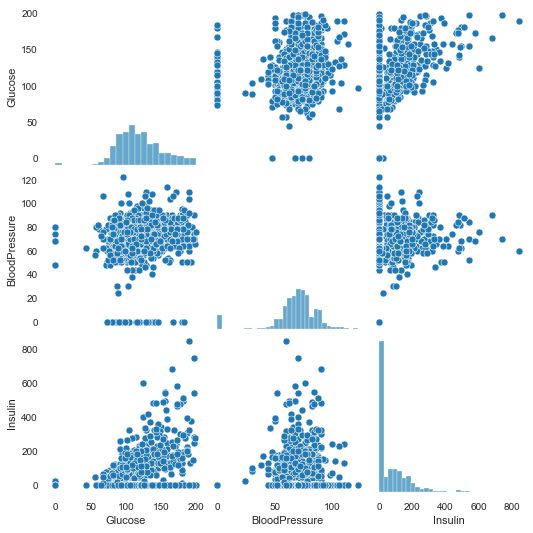

In [69]:
sns.pairplot(df_p3)
plt.show()